<a href="https://colab.research.google.com/github/melih84/Linear_regression_from_scratch/blob/main/linear_reg_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression From Scratch using only Numpy and Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd '/content/drive/My Drive/Projects'

/content/drive/My Drive/Projects


In [4]:
# I will be using the Auto Insurance in Sweden dataset from kaggla (https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset)
# Where X : number of claims 
# And Y : total payment for all the claims in thousands of Swedish Kronor

# Let's load the data

data = pd.read_csv("insurance.csv", header=None, names=["num_claims", "payment"])

In [5]:
data.head()

,num_claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [6]:
# Let's tranfer our values into two numpy arrays

X = data["num_claims"].values
Y = data["payment"].values

In [7]:
X

array([108,  19,  13, 124,  40,  57,  23,  14,  45,  10,   5,  48,  11,
        23,   7,   2,  24,   6,   3,  23,   6,   9,   9,   3,  29,   7,
         4,  20,   7,   4,   0,  25,   6,   5,  22,  11,  61,  12,   4,
        16,  13,  60,  41,  37,  55,  41,  11,  27,   8,   3,  17,  13,
        13,  15,   8,  29,  30,  24,   9,  31,  14,  53,  26])

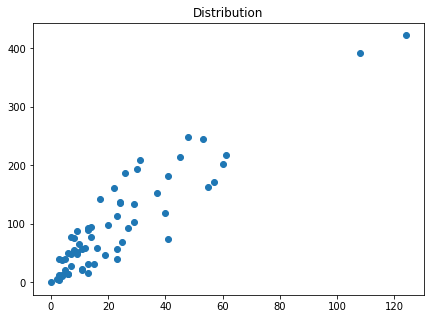

In [8]:
# Visializing the data distribution

plt.figure(figsize = (7,5))
plt.title("Distribution")
plt.scatter(X,Y)

In [9]:
# y_hat will have the form y_hat = m*x + b 
# Where x is vector which contains all numbers of claims, m is the slope of the line, and b is bias

# Let
m = 0
b = 0
epochs = 100
lr = 0.0001
n = np.float(len(X)) # 63


cost_history = []

for _ in range(epochs):
    # traning loop

    y_hat = m*X + b # has the shape (63,1)
    mse = np.sum((Y - y_hat)**2) / n
    cost_history.append(mse) 

    # derivatives

    dm = (-2 / n) * np.sum(X * (Y - y_hat))
    db = (-2 / n) * np.sum(Y - y_hat)


    # updates

    m = m - lr * dm
    b = b - lr * db



In [10]:
print("Optimal M : {}, Optimal B : {}".format(m,b))

Optimal M : 3.8394354507293165, Optimal B : 0.28327009014941695


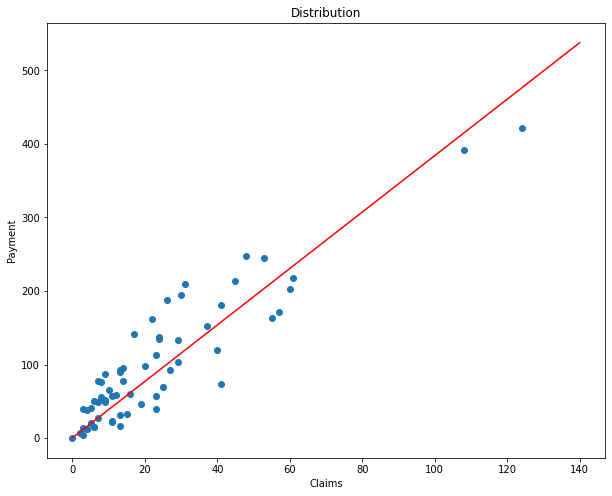

In [11]:
# Visualizing our line of best fit

x_line = np.linspace(0, 140, 10)
y_line = m * x_line + b
plt.figure(figsize=(10,8))
plt.title('Distribution')
plt.plot(x_line, y_line, c='r')
plt.scatter(X, Y)
plt.xlabel('Claims')
plt.ylabel('Payment')
plt.show()

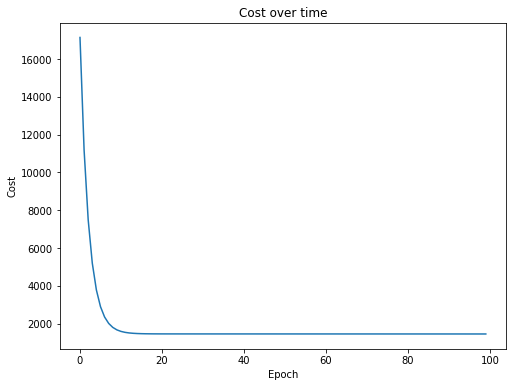

In [12]:
# Visualizing cost over time

plt.figure(figsize=(8,6))
plt.title("Cost over time")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(cost_history)